In [1]:
import os
import sys
from glob import glob
from itertools import product

import numpy as np
import torch
import datasets
import transformers
from transformers import AutoModel, AutoTokenizer

from bs4 import BeautifulSoup
from matplotlib import pyplot as plt
from pprint import pformat

%matplotlib inline

%load_ext autoreload
%autoreload 2

from narrative_time import conversion_utils
from narrative_time import modeling_utils
from narrative_time import event_relations

In [2]:
annotations = conversion_utils.get_annotations("../corpus/timebank/nt_format/tbd_a2_tml.jsonl")

(array([20.,  6.,  5.,  2.,  1.,  0.,  0.,  0.,  1.,  1.]),
 array([ 14. ,  38.2,  62.4,  86.6, 110.8, 135. , 159.2, 183.4, 207.6,
        231.8, 256. ]),
 <BarContainer object of 10 artists>)

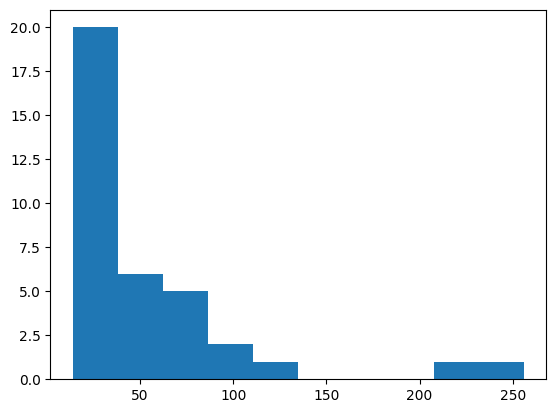

In [5]:
# number of events in each text
all_n_events = []
for ann in annotations:
    events_and_timexes = conversion_utils.get_events_and_timexes(ann, return_list=True)
    all_n_events.append(len(events_and_timexes))

plt.hist(all_n_events)

In [6]:
# total number of relations:
sum((e ** 2 - e) / 2. for e in all_n_events)

103748.0

(array([12., 14.,  4.,  0.,  1.,  2.,  1.,  0.,  0.,  2.]),
 array([ 127. ,  324.3,  521.6,  718.9,  916.2, 1113.5, 1310.8, 1508.1,
        1705.4, 1902.7, 2100. ]),
 <BarContainer object of 10 artists>)

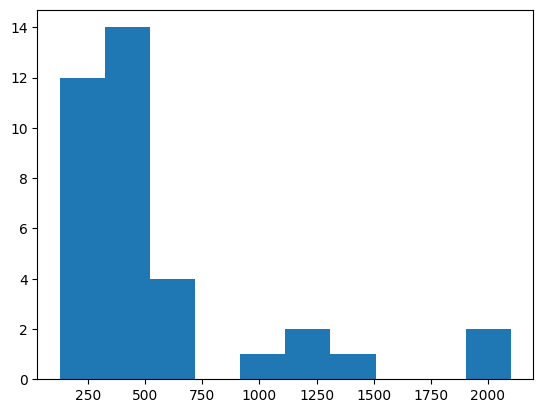

In [7]:
tokenizer = AutoTokenizer.from_pretrained("google/long-t5-tglobal-base")

# number of tokens in each text
all_n_tokens = []
for ann in annotations:
    tokens = tokenizer(ann["text"], max_length=None)
    all_n_tokens.append(len(tokens["input_ids"]))

plt.hist(all_n_tokens)

In [8]:
np.percentile(all_n_tokens, 50)

442.0

In [9]:
np.percentile(all_n_tokens, 95)

1542.0

In [7]:
rel2count = {rel: 0 for rel in event_relations.REL_TO_ID}
n_total_events = 0

for annotation in annotations:
    print(".", end="")
    annotation = modeling_utils.NTAnnotation.from_json(annotation)
    for relation in event_relations.REL_TO_ID.keys():
        rel2count[relation] += np.sum(annotation.event_relation_matrix == event_relations.REL_TO_ID[relation])

    n_total_events += np.sum(annotation.event_relation_matrix > -1)

{k: v / n_total_events for k, v in rel2count.items()}

....................................

{'BEFORE': 0.2880248293943016,
 'AFTER': 0.2880248293943016,
 'INCLUDES': 0.08071480896017273,
 'IS_INCLUDED': 0.08071480896017273,
 'SIMULTANEOUS': 0.08831977483903304,
 'OVERLAP': 0.0019952191849481435,
 'VAGUE': 0.1722057292670702}